In [342]:
import pysm3
import pysm3.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from funzioni import get_pixel_value_norm
from funzioni import polarizzazione 
import warnings
warnings.filterwarnings("ignore")


In [343]:
#costants
k = 1.38e-23
h = 6.626e-34
T=20
c=10e8
nu_I_d=545
nu_I_s=0.408
nu_P_d=353
nu_P_s=23
beta_d=1.54
beta_s=-3

In [344]:
#frequencies = np.array([40,50,60,68,78,89,100,119,140,166,195,235,280,337,402])
frequencies = np.linspace(10,1000,15)
pixels = np.arange(0,192)
ref_d = np.array([nu_I_d,nu_P_d,nu_P_d])
ref_s = np.array([nu_I_s,nu_P_s,nu_P_s])

In [345]:
Sky_d0=pysm3.Sky(nside=4, preset_strings=["d0"])
Sky_d1=pysm3.Sky(nside=4, preset_strings=["d1"])
Sky_d2=pysm3.Sky(nside=4, preset_strings=["d2"])
Sky_d3=pysm3.Sky(nside=4, preset_strings=["d3"])
Sky_d4=pysm3.Sky(nside=4, preset_strings=["d4"])
Sky_d5=pysm3.Sky(nside=4, preset_strings=["d5"])
Sky_d6=pysm3.Sky(nside=4, preset_strings=["d6"])
Sky_d7=pysm3.Sky(nside=4, preset_strings=["d7"])
Sky_d8=pysm3.Sky(nside=4, preset_strings=["d8"])


Sky_s0=pysm3.Sky(nside=4, preset_strings=["s0"])
Sky_s1=pysm3.Sky(nside=4, preset_strings=["s1"])
Sky_s2=pysm3.Sky(nside=4, preset_strings=["s2"])
Sky_s3=pysm3.Sky(nside=4, preset_strings=["s3"])


In [346]:

d0=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d0))
d1=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d1))
d2=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d2))
d3=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d3))
d4=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d4))
d5=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d5))
d7=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_d,sky=Sky_d7))


s0=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s0))
s1=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s1))
s2=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s2))
s3=np.array(get_pixel_value_norm(frequencies,ref_frequencies=ref_s,sky=Sky_s3))

print("The output is an array of 15 frequencies, 3 Stokes and 192 pixels.") 
print("For each Stokes the code takes the right ref_frequencies, an array that has the same shape of Stokes. ")
print(d0.shape)



The output is an array of 15 frequencies, 3 Stokes and 192 pixels.
For each Stokes the code takes the right ref_frequencies, an array that has the same shape of Stokes. 
(15, 3, 192)


Dust models for all the frequencies and all the pixels. 


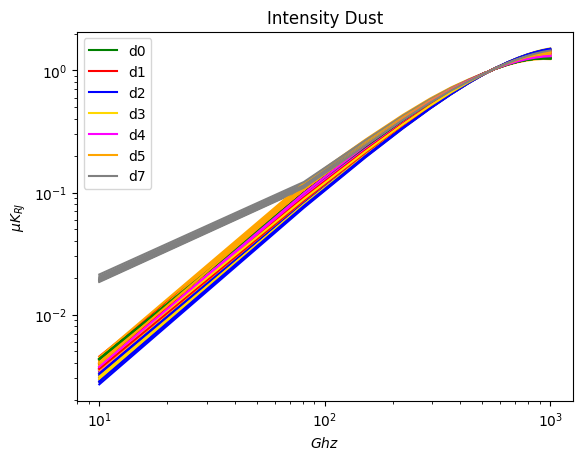

In [347]:

for i,val_i in enumerate(d0[:,0,:]):
    plt.plot(frequencies,d0[:,0,i],'-',color='green')
    plt.plot(frequencies,d1[:,0,i],'-',color='red')
    plt.plot(frequencies,d2[:,0,i],'-',color='blue')
    plt.plot(frequencies,d3[:,0,i],'-',color='gold')
    plt.plot(frequencies,d4[:,0,i],'-',color='magenta')
    plt.plot(frequencies,d5[:,0,i],'-',color='orange')
    plt.plot(frequencies,d7[:,0,i],'-',color='grey')
   
plt.title("Intensity Dust")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend(["d0", "d1","d2","d3","d4","d5","d7"])
print("Dust models for all the frequencies and all the pixels. ")

In [348]:
d=d0-d1

The plot shows the difference in Intensity between the two models d0 and d1, for all the frequencies and all the pixels.


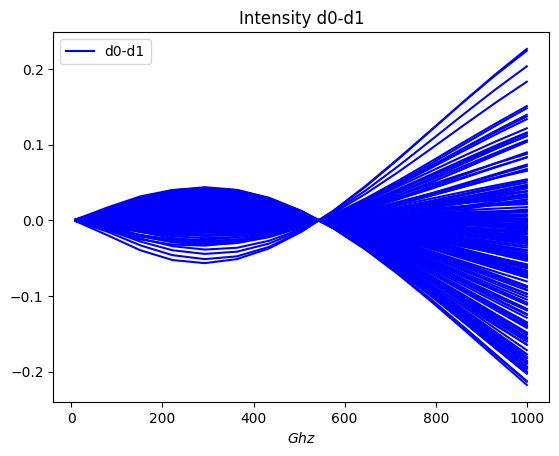

In [349]:
for i,val_i in enumerate(d0[0,0,:]):
    plt.plot(frequencies,d[:,0,i],'-',color='blue')
   
plt.title("Intensity d0-d1")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.legend(["d0-d1"])
print("The plot shows the difference in Intensity between the two models d0 and d1, for all the frequencies and all the pixels.")

The plot shows the difference in Polarization between the two models d0 and d1, for all the frequencies and all the pixels.


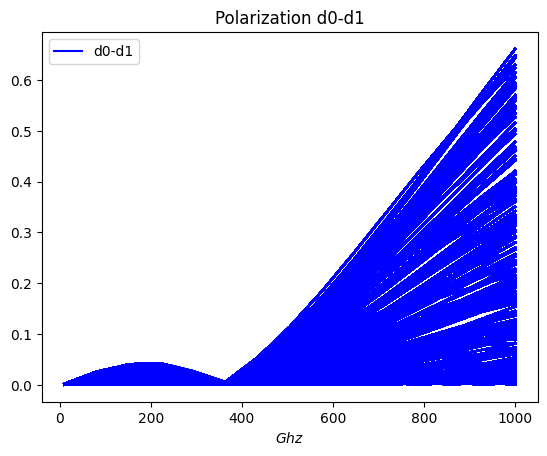

In [350]:
for i,val_i in enumerate(d0[0,1,:]):
    for i,val_i in enumerate(d0[0,2,:]):
        plt.plot(frequencies,polarizzazione(d[:,1,i],d[:,2,i]),'-',color='blue',label="d0-d1")

plt.title("Polarization d0-d1")
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.legend(["d0-d1"])
print("The plot shows the difference in Polarization between the two models d0 and d1, for all the frequencies and all the pixels.")


Synchrotron models for all the frequencies and all the pixels. 


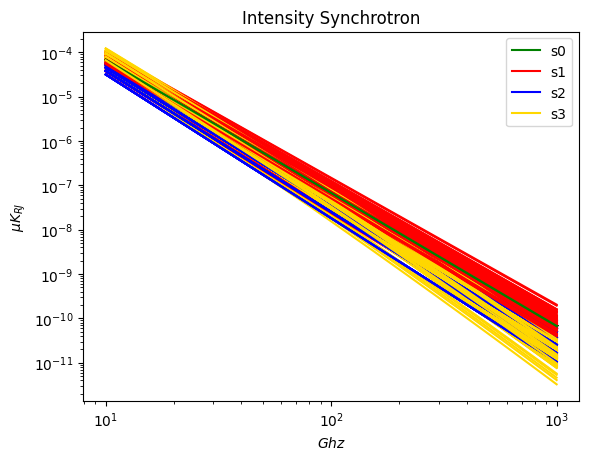

In [351]:
for i,_ in enumerate(s0[0,0,:]):
    plt.plot(frequencies,s0[:,0,i],'-',color='green',label="I_s0")
    plt.plot(frequencies,s1[:,0,i],'-',color='red',label="I_s1")
    plt.plot(frequencies,s2[:,0,i],'-',color='blue',label="I_s2")
    plt.plot(frequencies,s3[:,0,i],'-',color='gold',label="I_s3")
   
plt.title("Intensity Synchrotron")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.ylabel(r'$\mu$$K_{RJ}$')
plt.legend(["s0", "s1","s2","s3"])
print("Synchrotron models for all the frequencies and all the pixels. ")

In [352]:
s=s0-s1

The plot shows the difference in Intensity between the two models s0 and s1, for all the frequencies and all the pixels.


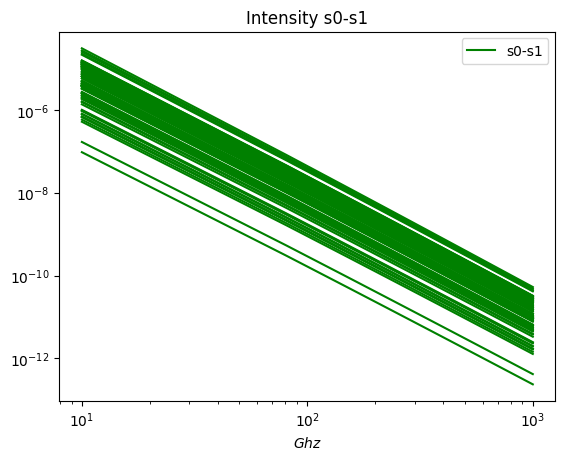

In [353]:
for i,val_i in enumerate(s0[0,0,:]):
    plt.plot(frequencies,s[:,0,i],'-',color='green')

plt.title("Intensity s0-s1")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.legend(["s0-s1"])
print("The plot shows the difference in Intensity between the two models s0 and s1, for all the frequencies and all the pixels.")


The plot shows the difference in Polarization between the two models s0 and s1, for all the frequencies and all the pixels.


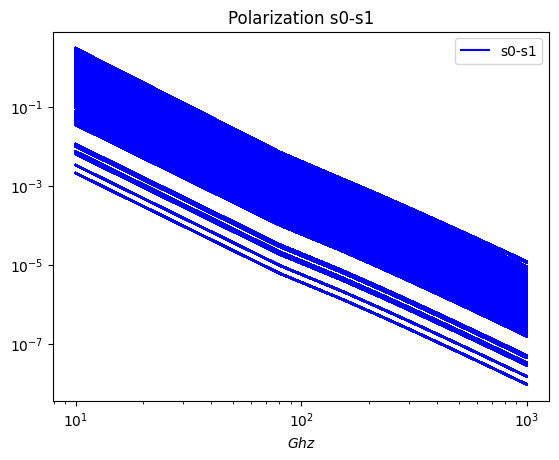

In [354]:
for i,val_i in enumerate(s0[0,1,:]):
    for i,val_i in enumerate(s0[0,2,:]):
        plt.plot(frequencies,polarizzazione(s[:,1,i],s[:,2,i]),'-',color='blue',label="d0-d1")

plt.title("Polarization s0-s1")
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Ghz$')
plt.legend(["s0-s1"])
print("The plot shows the difference in Polarization between the two models s0 and s1, for all the frequencies and all the pixels.")